In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('supermarket-prediction.csv')


In [189]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [190]:
# Data preprocessing
# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)


In [191]:
print(df.columns)


Index(['Id', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')


In [192]:
df

,Id,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1826,1970,84835.0,0,0,6/16/2014,0,189,104,379,...,True,False,False,False,True,False,False,False,False,False
1,1,1961,57091.0,0,0,6/15/2014,0,464,5,64,...,True,False,False,False,False,False,True,False,False,False
2,10476,1958,67267.0,0,1,5/13/2014,0,134,11,59,...,True,False,False,False,False,True,False,False,False,False
3,1386,1967,32474.0,1,1,11/5/2014,0,10,0,1,...,True,False,False,False,False,False,False,True,False,False
4,5371,1989,21474.0,1,0,8/4/2014,0,6,16,24,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,7/3/2013,99,372,18,126,...,False,False,True,False,True,False,False,False,False,False
2236,5263,1977,31056.0,1,0,1/22/2013,99,5,10,13,...,False,False,False,False,False,True,False,False,False,False
2237,22,1976,46310.0,1,0,3/12/2012,99,185,2,88,...,True,False,False,False,True,False,False,False,False,False
2238,528,1978,65819.0,0,0,11/29/2012,99,267,38,701,...,True,False,False,False,False,True,False,False,False,False


In [193]:
# Identify rows with any missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Display rows with missing values
print("\nRows with missing values:")
print(rows_with_missing_values)

# Find columns with missing values for each row
print("\nColumns with missing values in each row:")
for index, row in rows_with_missing_values.iterrows():
    missing_columns = row[row.isnull()].index.tolist()
    print(f"Row index {index} has missing values in columns: {missing_columns}")



Rows with missing values:
         Id  Year_Birth  Income  Kidhome  Teenhome Dt_Customer  Recency  \
134    8996        1957     NaN        2         1  11/19/2012        4   
262    1994        1983     NaN        1         0  11/15/2013       11   
394    3769        1972     NaN        1         0    2/3/2014       17   
449    5255        1986     NaN        1         0   2/20/2013       19   
525    8268        1961     NaN        0         1   11/7/2013       23   
590   10629        1973     NaN        1         0   9/14/2012       25   
899   10475        1970     NaN        0         1    1/4/2013       39   
997    9235        1957     NaN        1         1   5/27/2014       45   
1096   4345        1964     NaN        1         1   12/1/2014       49   
1185   7187        1969     NaN        1         1   5/18/2013       52   
1213   8720        1978     NaN        0         0   12/8/2012       53   
1312   8557        1982     NaN        1         0   6/17/2013       57  

In [194]:
import pandas as pd

# Mean Imputation for 'Income'
df['Income'].fillna(df['Income'].mean(), inplace=True)

# Display rows after imputation to verify
print("\nRows after mean imputation for 'Income':")
print(df[df['Income'].isnull()])  # Should return an empty DataFrame if all missing values are filled



Rows after mean imputation for 'Income':
Empty DataFrame
Columns: [Id, Year_Birth, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain, Education_Basic, Education_Graduation, Education_Master, Education_PhD, Marital_Status_Alone, Marital_Status_Divorced, Marital_Status_Married, Marital_Status_Single, Marital_Status_Together, Marital_Status_Widow, Marital_Status_YOLO]
Index: []

[0 rows x 31 columns]


/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_67281/1156532251.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(), inplace=True)


In [195]:
# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%Y')

# Create a new feature 'Customer_Years' representing the number of years since enrollment
df['Customer_Years'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days / 365.25

# Optionally drop 'Dt_Customer' if not needed
df.drop(['Dt_Customer'], axis=1, inplace=True)


In [196]:
df

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Customer_Years
0,1826,1970,84835.0,0,0,0,189,104,379,111,...,False,False,False,True,False,False,False,False,False,10.026010
1,1,1961,57091.0,0,0,0,464,5,64,7,...,False,False,False,False,False,True,False,False,False,10.028747
2,10476,1958,67267.0,0,1,0,134,11,59,15,...,False,False,False,False,True,False,False,False,False,10.119097
3,1386,1967,32474.0,1,1,0,10,0,1,0,...,False,False,False,False,False,False,True,False,False,9.637235
4,5371,1989,21474.0,1,0,0,6,16,24,11,...,False,False,False,False,False,True,False,False,False,9.891855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,99,372,18,126,47,...,False,True,False,True,False,False,False,False,False,10.978782
2236,5263,1977,31056.0,1,0,99,5,10,13,3,...,False,False,False,False,True,False,False,False,False,11.422313
2237,22,1976,46310.0,1,0,99,185,2,88,15,...,False,False,False,True,False,False,False,False,False,12.287474
2238,528,1978,65819.0,0,0,99,267,38,701,149,...,False,False,False,False,True,False,False,False,False,11.570157


In [197]:
# Add a new feature for total amount spent
df['Total_Mnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Check class balance and perform resampling if necessary
print("Initial class balance:")
print(df['Response'].value_counts())

Initial class balance:
Response
0    1906
1     334
Name: count, dtype: int64


In [198]:
df

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Customer_Years,Total_Mnt
0,1826,1970,84835.0,0,0,0,189,104,379,111,...,False,False,True,False,False,False,False,False,10.026010,1190
1,1,1961,57091.0,0,0,0,464,5,64,7,...,False,False,False,False,True,False,False,False,10.028747,577
2,10476,1958,67267.0,0,1,0,134,11,59,15,...,False,False,False,True,False,False,False,False,10.119097,251
3,1386,1967,32474.0,1,1,0,10,0,1,0,...,False,False,False,False,False,True,False,False,9.637235,11
4,5371,1989,21474.0,1,0,0,6,16,24,11,...,False,False,False,False,True,False,False,False,9.891855,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,99,372,18,126,47,...,True,False,True,False,False,False,False,False,10.978782,689
2236,5263,1977,31056.0,1,0,99,5,10,13,3,...,False,False,False,True,False,False,False,False,11.422313,55
2237,22,1976,46310.0,1,0,99,185,2,88,15,...,False,False,True,False,False,False,False,False,12.287474,309
2238,528,1978,65819.0,0,0,99,267,38,701,149,...,False,False,False,True,False,False,False,False,11.570157,1383


In [199]:
# Check data types of the DataFrame
print(df.dtypes)


Id                           int64
Year_Birth                   int64
Income                     float64
Kidhome                      int64
Teenhome                     int64
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
Response                     int64
Complain                     int64
Education_Basic               bool
Education_Graduation          bool
Education_Master              bool
Education_PhD                 bool
Marital_Status_Alone          bool
Marital_Status_Divorced       bool
Marital_Status_Married        bool
Marital_Status_Single         bool
Marital_Status_Together       bool
Marital_Status_Widow

In [200]:
# Convert boolean columns to float
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(float)

# Verify the conversion
print(df.dtypes)


Id                           int64
Year_Birth                   int64
Income                     float64
Kidhome                      int64
Teenhome                     int64
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
Response                     int64
Complain                     int64
Education_Basic            float64
Education_Graduation       float64
Education_Master           float64
Education_PhD              float64
Marital_Status_Alone       float64
Marital_Status_Divorced    float64
Marital_Status_Married     float64
Marital_Status_Single      float64
Marital_Status_Together    float64
Marital_Status_Widow

In [201]:
# Split the data
X = df.drop(['Id', 'Response'], axis=1)
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [202]:
# Verify the data types of X_train and X_test
print("Data types in X_train:")
print(X_train.dtypes)

print("\nData types in X_test:")
print(X_test.dtypes)


Data types in X_train:
Year_Birth                   int64
Income                     float64
Kidhome                      int64
Teenhome                     int64
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
Complain                     int64
Education_Basic            float64
Education_Graduation       float64
Education_Master           float64
Education_PhD              float64
Marital_Status_Alone       float64
Marital_Status_Divorced    float64
Marital_Status_Married     float64
Marital_Status_Single      float64
Marital_Status_Together    float64
Marital_Status_Widow       float64
Marital_Status_YOLO        float

In [203]:
# Check for any object (string) data types in X_train and X_test
print("Columns in X_train with object data type:")
print(X_train.select_dtypes(include=['object']).columns)

print("\nColumns in X_test with object data type:")
print(X_test.select_dtypes(include=['object']).columns)


Columns in X_train with object data type:
Index([], dtype='object')

Columns in X_test with object data type:
Index([], dtype='object')


In [204]:
# Convert 'Complain' to float for consistency
X_train['Complain'] = X_train['Complain'].astype(float)
X_test['Complain'] = X_test['Complain'].astype(float)


In [207]:
pip install imblearn


[notice] A new release of pip is available: 23.3.1 -> 24.1
[notice] To update, run: /Users/sandrachoo/myenv1/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [291]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, ClassifierMixin

# Node class to represent each node in the decision tree
class DecisionNode:
    def __init__(self, split_feature_idx=None, split_threshold_val=None, left_branch=None, right_branch=None, predicted_class=None):
        self.split_feature_idx = split_feature_idx  # Index of feature for splitting
        self.split_threshold_val = split_threshold_val  # Value to split the feature at
        self.left_branch = left_branch  # Left subtree
        self.right_branch = right_branch  # Right subtree
        self.predicted_class = predicted_class  # Class prediction if it's a leaf node

# Function to compute Gini impurity
def compute_gini_impurity(labels):
    unique_classes, class_counts = np.unique(labels, return_counts=True)
    class_probabilities = class_counts / class_counts.sum()
    return 1 - np.sum(class_probabilities ** 2)

# Function to build the decision tree recursively
def construct_decision_tree(data_features, data_labels, current_depth=0, max_tree_depth=5):
    num_samples, num_features = data_features.shape
    if num_samples <= 1 or current_depth >= max_tree_depth:
        # Predict the most common class at the leaf node
        common_class = np.bincount(data_labels).argmax()
        return DecisionNode(predicted_class=common_class)
    
    optimal_split = {'gini_score': float('inf'), 'split_feature_idx': None, 'split_threshold_val': None, 'left_indices': None, 'right_indices': None}
    for feature_idx in range(num_features):
        possible_thresholds = np.unique(data_features[:, feature_idx])
        for threshold_val in possible_thresholds:
            left_indices = data_features[:, feature_idx] <= threshold_val
            right_indices = data_features[:, feature_idx] > threshold_val
            
            if len(np.unique(left_indices)) == 1 or len(np.unique(right_indices)) == 1:
                continue
            
            left_gini = compute_gini_impurity(data_labels[left_indices])
            right_gini = compute_gini_impurity(data_labels[right_indices])
            weighted_gini = (len(data_labels[left_indices]) * left_gini + 
                             len(data_labels[right_indices]) * right_gini) / num_samples
            
            if weighted_gini < optimal_split['gini_score']:
                optimal_split.update({
                    'gini_score': weighted_gini,
                    'split_feature_idx': feature_idx,
                    'split_threshold_val': threshold_val,
                    'left_indices': left_indices,
                    'right_indices': right_indices
                })
    
    if optimal_split['left_indices'] is None or optimal_split['right_indices'] is None:
        # If no valid split was found, return a leaf node with the most common class
        common_class = np.bincount(data_labels).argmax()
        return DecisionNode(predicted_class=common_class)

    left_subtree = construct_decision_tree(data_features[optimal_split['left_indices']], data_labels[optimal_split['left_indices']], current_depth + 1, max_tree_depth)
    right_subtree = construct_decision_tree(data_features[optimal_split['right_indices']], data_labels[optimal_split['right_indices']], current_depth + 1, max_tree_depth)
    
    return DecisionNode(split_feature_idx=optimal_split['split_feature_idx'], split_threshold_val=optimal_split['split_threshold_val'], 
                        left_branch=left_subtree, right_branch=right_subtree)

# Function to predict the class for a single sample using the decision tree
def predict_with_decision_tree(node, sample_data):
    if node.predicted_class is not None:
        return node.predicted_class  # Return the class prediction for classification
    if sample_data[node.split_feature_idx] <= node.split_threshold_val:
        return predict_with_decision_tree(node.left_branch, sample_data)
    return predict_with_decision_tree(node.right_branch, sample_data)

In [287]:

class CustomKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, neighbor_count=3, distance_measure='euclidean', weight_scheme='uniform'):
        self.neighbor_count = neighbor_count
        self.distance_measure = distance_measure
        self.weight_scheme = weight_scheme

    def fit(self, feature_matrix, label_vector):
        self.feature_matrix = np.array(feature_matrix)
        self.label_vector = np.array(label_vector)
        return self

    def predict(self, test_matrix):
        test_matrix = np.array(test_matrix)
        predictions = [self._predict_instance(instance) for instance in test_matrix]
        return np.array(predictions)

    def _predict_instance(self, instance):
        instance = np.array(instance)  # Ensure instance is a numpy array
        if self.distance_measure == 'euclidean':
            computed_distances = [np.linalg.norm(instance - feature) for feature in self.feature_matrix]
        elif self.distance_measure == 'manhattan':
            computed_distances = [np.sum(np.abs(instance - feature)) for feature in self.feature_matrix]
        
        nearest_neighbors_indices = np.argsort(computed_distances)[:self.neighbor_count]
        nearest_neighbors_labels = [self.label_vector[i] for i in nearest_neighbors_indices]
        
        if self.weight_scheme == 'uniform':
            most_frequent_label = np.bincount(nearest_neighbors_labels).argmax()
        elif self.weight_scheme == 'distance':
            inv_distances = 1 / (np.array(computed_distances)[nearest_neighbors_indices] + 1e-5)
            most_frequent_label = np.bincount(nearest_neighbors_labels, weights=inv_distances).argmax()
        
        return most_frequent_label

    def get_params(self, deep=True):
        return {"neighbor_count": self.neighbor_count, "distance_measure": self.distance_measure, "weight_scheme": self.weight_scheme}

    def set_params(self, **params):
        for parameter_key, parameter_value in params.items():
            setattr(self, parameter_key, parameter_value)
        return self

In [292]:
class CustomNaiveBayes(BaseEstimator, ClassifierMixin):
    def fit(self, data_matrix, label_vector):
        self.distinct_classes = np.unique(label_vector)
        self.parameters = {}
        
        for class_val in self.distinct_classes:
            class_features = data_matrix[label_vector == class_val]
            self.parameters[class_val] = {
                "prior_probability": len(class_features) / len(data_matrix),
                "mean_value": class_features.mean(axis=0),
                "variance_value": class_features.var(axis=0) + 1e-9  # Adding a small value to avoid division by zero
            }

    def _calculate_likelihood(self, mean, variance, instance):
        # Gaussian likelihood calculation
        exponent_part = np.exp(- ((instance - mean) ** 2) / (2 * variance))
        return (1 / np.sqrt(2 * np.pi * variance)) * exponent_part

    def _calculate_posterior(self, instance):
        posterior_probabilities = []
        
        for class_val in self.distinct_classes:
            log_prior = np.log(self.parameters[class_val]["prior_probability"])  # log to prevent underflow
            log_conditional = np.sum(np.log(self._calculate_likelihood(self.parameters[class_val]["mean_value"], self.parameters[class_val]["variance_value"], instance)))
            posterior_probability = log_prior + log_conditional
            posterior_probabilities.append(posterior_probability)
        
        return self.distinct_classes[np.argmax(posterior_probabilities)]
    
    def predict(self, data_matrix):
        return np.array([self._calculate_posterior(instance) for instance in data_matrix])

    def score(self, data_matrix, actual_labels):
        predicted_labels = self.predict(data_matrix)
        return accuracy_score(actual_labels, predicted_labels)
    
    def get_params(self, deep=True):
        return {}

    def set_params(self, **params):
        return self


In [293]:

# Define functions to generate a confusion matrix and calculate classification metrics
def create_confusion_matrix(real_labels, predicted_labels):
    distinct_classes = np.unique(real_labels)
    total_classes = len(distinct_classes)
    confusion_matrix = np.zeros((total_classes, total_classes), dtype=int)

    for actual, predicted in zip(real_labels, predicted_labels):
        confusion_matrix[actual, predicted] += 1

    return confusion_matrix

def calculate_classification_metrics(conf_matrix):
    class_count = conf_matrix.shape[0]
    precision_array = np.zeros(class_count)
    recall_array = np.zeros(class_count)
    f1_score_array = np.zeros(class_count)

    for index in range(class_count):
        true_positive_count = conf_matrix[index, index]
        false_positive_count = np.sum(conf_matrix[:, index]) - true_positive_count
        false_negative_count = np.sum(conf_matrix[index, :]) - true_positive_count
        
        if true_positive_count + false_positive_count > 0:
            precision_array[index] = true_positive_count / (true_positive_count + false_positive_count)
        if true_positive_count + false_negative_count > 0:
            recall_array[index] = true_positive_count / (true_positive_count + false_negative_count)
        if precision_array[index] + recall_array[index] > 0:
            f1_score_array[index] = 2 * (precision_array[index] * recall_array[index]) / (precision_array[index] + recall_array[index])

    return precision_array, recall_array, f1_score_array

def assess_model_with_custom_metrics(algorithm_instance, training_features, training_labels, testing_features, testing_labels, algorithm_name):
    # Execute cross-validation
    validation_scores = cross_val_score(algorithm_instance, training_features, training_labels, cv=5)
    print(f'{algorithm_name} Cross-Validation Scores: {validation_scores}')
    print(f'{algorithm_name} Mean CV Score: {validation_scores.mean()}')

    # Fit the model with training data
    algorithm_instance.fit(training_features, training_labels)

    # Predict using the model on test data
    predicted_labels = algorithm_instance.predict(testing_features)

    # Evaluate model performance
    accuracy_metric = accuracy_score(testing_labels, predicted_labels)
    confusion_matrix = create_confusion_matrix(testing_labels, predicted_labels)
    precision, recall, f1 = calculate_classification_metrics(confusion_matrix)

    print(f'Accuracy ({algorithm_name}): {accuracy_metric:.2f}')
    print(f'Confusion Matrix ({algorithm_name}):')
    print(confusion_matrix)
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    
    return {
        "accuracy": accuracy_metric,
        "conf_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


KNN Cross-Validation Scores: [0.8551532  0.84958217 0.8547486  0.84636872 0.83798883]
KNN Mean CV Score: 0.848768304259193
Accuracy (KNN): 0.85
Confusion Matrix (KNN):
[[369  12]
 [ 53  14]]
Precision: [0.87440758 0.53846154]
Recall: [0.96850394 0.20895522]
F1 Score: [0.91905355 0.30107527]
Naive Bayes Cross-Validation Scores: [0.7632312  0.22841226 0.82681564 0.18156425 0.85195531]
Naive Bayes Mean CV Score: 0.5703957299139446
Accuracy (Naive Bayes): 0.77
Confusion Matrix (Naive Bayes):
[[309  72]
 [ 31  36]]
Precision: [0.90882353 0.33333333]
Recall: [0.81102362 0.53731343]
F1 Score: [0.85714286 0.41142857]


/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_67281/851778555.py:24: RuntimeWarning: divide by zero encountered in log
  log_conditional = np.sum(np.log(self._calculate_likelihood(self.parameters[class_val]["mean_value"], self.parameters[class_val]["variance_value"], instance)))
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_67281/851778555.py:24: RuntimeWarning: divide by zero encountered in log
  log_conditional = np.sum(np.log(self._calculate_likelihood(self.parameters[class_val]["mean_value"], self.parameters[class_val]["variance_value"], instance)))
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_67281/851778555.py:24: RuntimeWarning: divide by zero encountered in log
  log_conditional = np.sum(np.log(self._calculate_likelihood(self.parameters[class_val]["mean_value"], self.parameters[class_val]["variance_value"], instance)))
/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_67281/851778555.py:24: RuntimeWarning: divide by zero encounte

           Model  Accuracy  Precision    Recall  F1 Score
0            KNN  0.854911   0.706435  0.588730  0.610064
1    Naive Bayes  0.770089   0.621078  0.674169  0.634286
2  Decision Tree  0.850446   0.694307  0.635308  0.655523


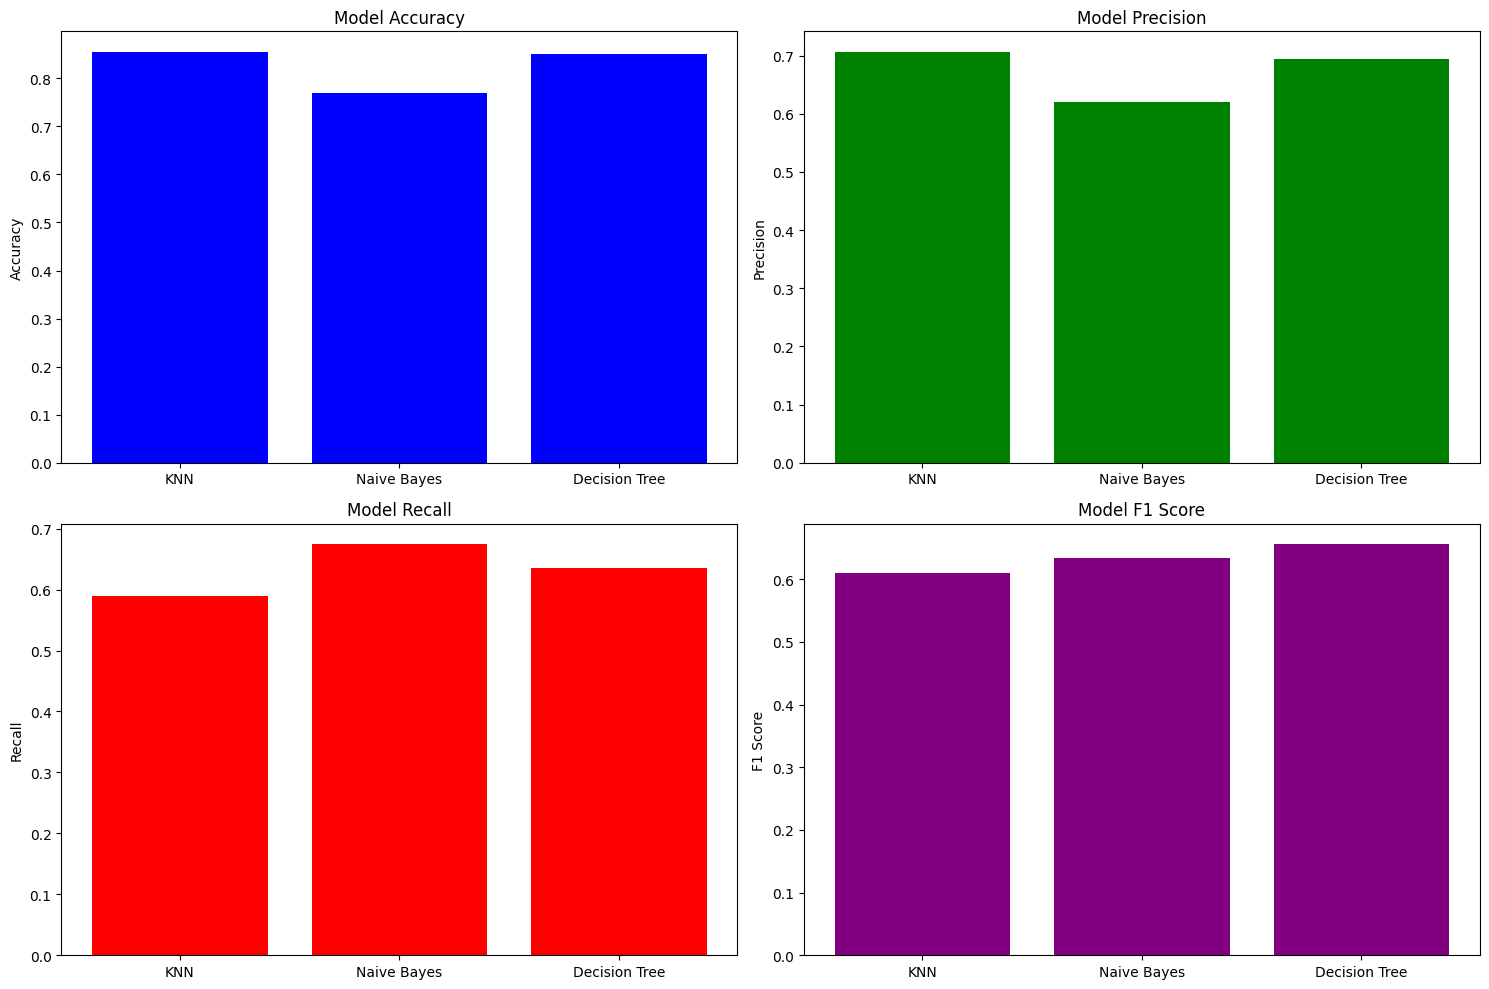

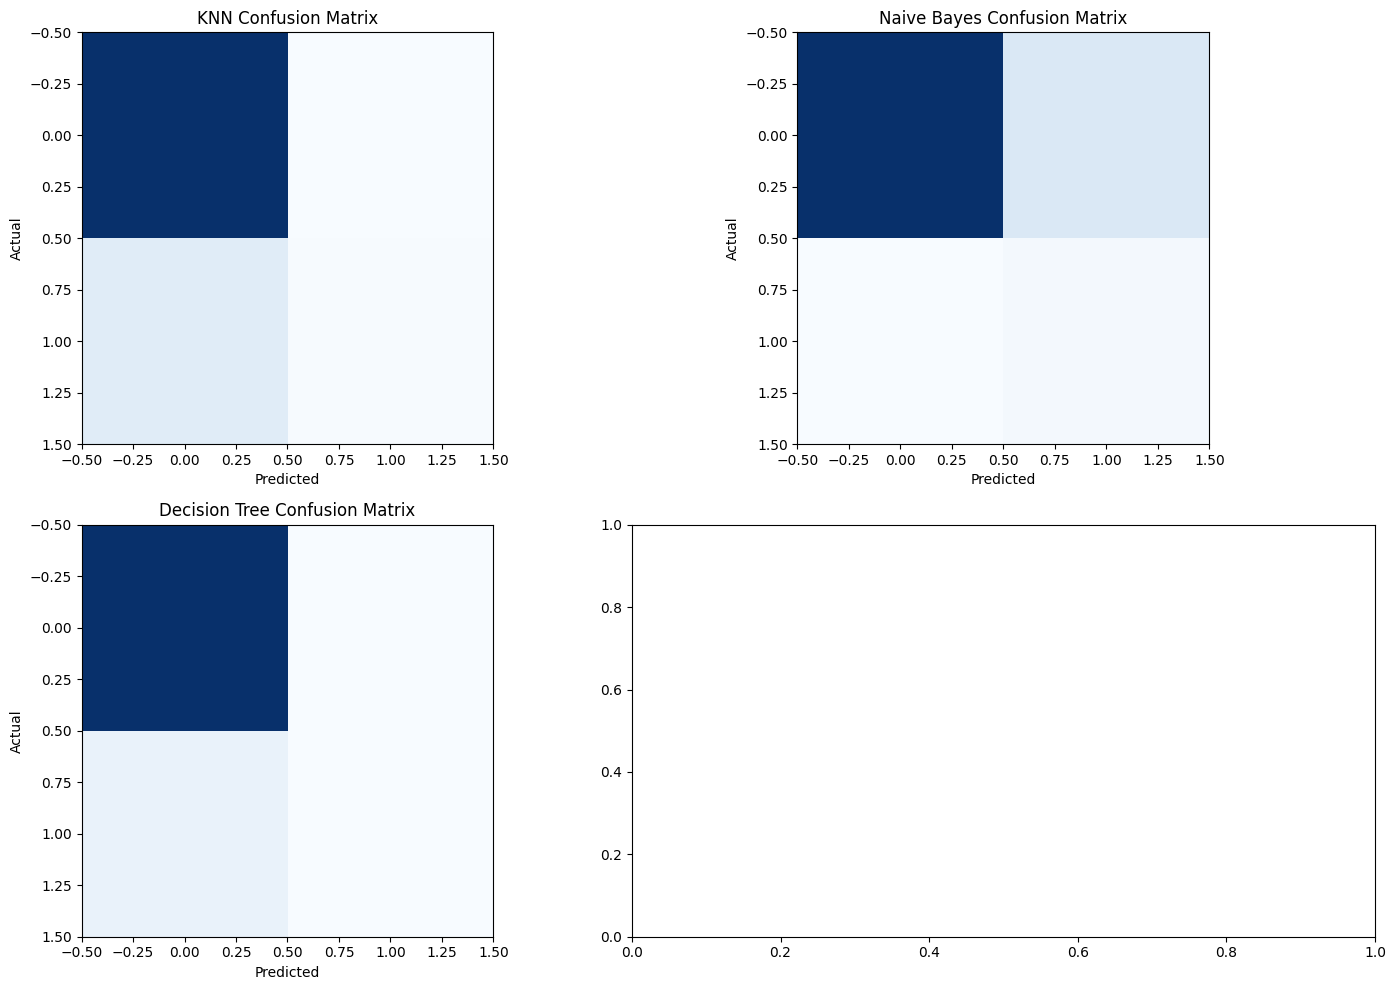

In [294]:

import matplotlib.pyplot as plt

# Split the data
X = df.drop(['Id', 'Response'], axis=1)
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "KNN": CustomKNN(neighbor_count=5),
    "Naive Bayes": CustomNaiveBayes()
}

# Evaluate models
results = {}

for model_name, model in models.items():
    results[model_name] = assess_model_with_custom_metrics(model, X_train, y_train, X_test, y_test, model_name)

# Train the decision tree model
tree = construct_decision_tree(X_train, y_train, max_tree_depth=5)

# Make predictions using the decision tree
predictions_tree = np.array([predict_with_decision_tree(tree, sample) for sample in X_test])

# Evaluate Decision Tree
tree_accuracy = accuracy_score(y_test, predictions_tree)
tree_conf_matrix = create_confusion_matrix(y_test, predictions_tree)
tree_precision, tree_recall, tree_f1 = calculate_classification_metrics(tree_conf_matrix)

tree_results = {
    "accuracy": tree_accuracy,
    "conf_matrix": tree_conf_matrix,
    "precision": tree_precision,
    "recall": tree_recall,
    "f1": tree_f1
}

results["Decision Tree"] = tree_results

# Function to safely extract mean values from results
def safe_mean(metric):
    if isinstance(metric, np.ndarray) or isinstance(metric, list):
        return np.mean(metric)
    return metric

# Collect all results into a DataFrame for easy comparison
results_df = pd.DataFrame({
    "Model": ["KNN", "Naive Bayes", "Decision Tree"],
    "Accuracy": [results["KNN"]["accuracy"], results["Naive Bayes"]["accuracy"], results["Decision Tree"]["accuracy"]],
    "Precision": [safe_mean(results["KNN"]["precision"]), safe_mean(results["Naive Bayes"]["precision"]), safe_mean(results["Decision Tree"]["precision"])],
    "Recall": [safe_mean(results["KNN"]["recall"]), safe_mean(results["Naive Bayes"]["recall"]), safe_mean(results["Decision Tree"]["recall"])],
    "F1 Score": [safe_mean(results["KNN"]["f1"]), safe_mean(results["Naive Bayes"]["f1"]), safe_mean(results["Decision Tree"]["f1"])]
})

print(results_df)

# Plot the comparison of the models
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy
ax[0, 0].bar(results_df["Model"], results_df["Accuracy"], color='blue')
ax[0, 0].set_title("Model Accuracy")
ax[0, 0].set_ylabel("Accuracy")

# Precision
ax[0, 1].bar(results_df["Model"], results_df["Precision"], color='green')
ax[0, 1].set_title("Model Precision")
ax[0, 1].set_ylabel("Precision")

# Recall
ax[1, 0].bar(results_df["Model"], results_df["Recall"], color='red')
ax[1, 0].set_title("Model Recall")
ax[1, 0].set_ylabel("Recall")

# F1 Score
ax[1, 1].bar(results_df["Model"], results_df["F1 Score"], color='purple')
ax[1, 1].set_title("Model F1 Score")
ax[1, 1].set_ylabel("F1 Score")

plt.tight_layout()
plt.show()

# Display the confusion matrices for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# KNN Confusion Matrix
axs[0, 0].imshow(results["KNN"]["conf_matrix"], cmap='Blues', interpolation='nearest')
axs[0, 0].set_title("KNN Confusion Matrix")
axs[0, 0].set_xlabel("Predicted")
axs[0, 0].set_ylabel("Actual")

# Naive Bayes Confusion Matrix
axs[0, 1].imshow(results["Naive Bayes"]["conf_matrix"], cmap='Blues', interpolation='nearest')
axs[0, 1].set_title("Naive Bayes Confusion Matrix")
axs[0, 1].set_xlabel("Predicted")
axs[0, 1].set_ylabel("Actual")

# Decision Tree Confusion Matrix
axs[1, 0].imshow(results["Decision Tree"]["conf_matrix"], cmap='Blues', interpolation='nearest')
axs[1, 0].set_title("Decision Tree Confusion Matrix")
axs[1, 0].set_xlabel("Predicted")
axs[1, 0].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Introducing solution for better result

/var/folders/pn/vsml0m511vvb99cnwq7986100000gn/T/ipykernel_67281/851778555.py:24: RuntimeWarning: divide by zero encountered in log
  log_conditional = np.sum(np.log(self._calculate_likelihood(self.parameters[class_val]["mean_value"], self.parameters[class_val]["variance_value"], instance)))


           Model  Accuracy  Precision    Recall  F1 Score
0            KNN  0.781250   0.843747  0.781250  0.803291
1    Naive Bayes  0.707589   0.819227  0.707589  0.744905
2  Decision Tree  0.752232   0.635464  0.725173  0.646514


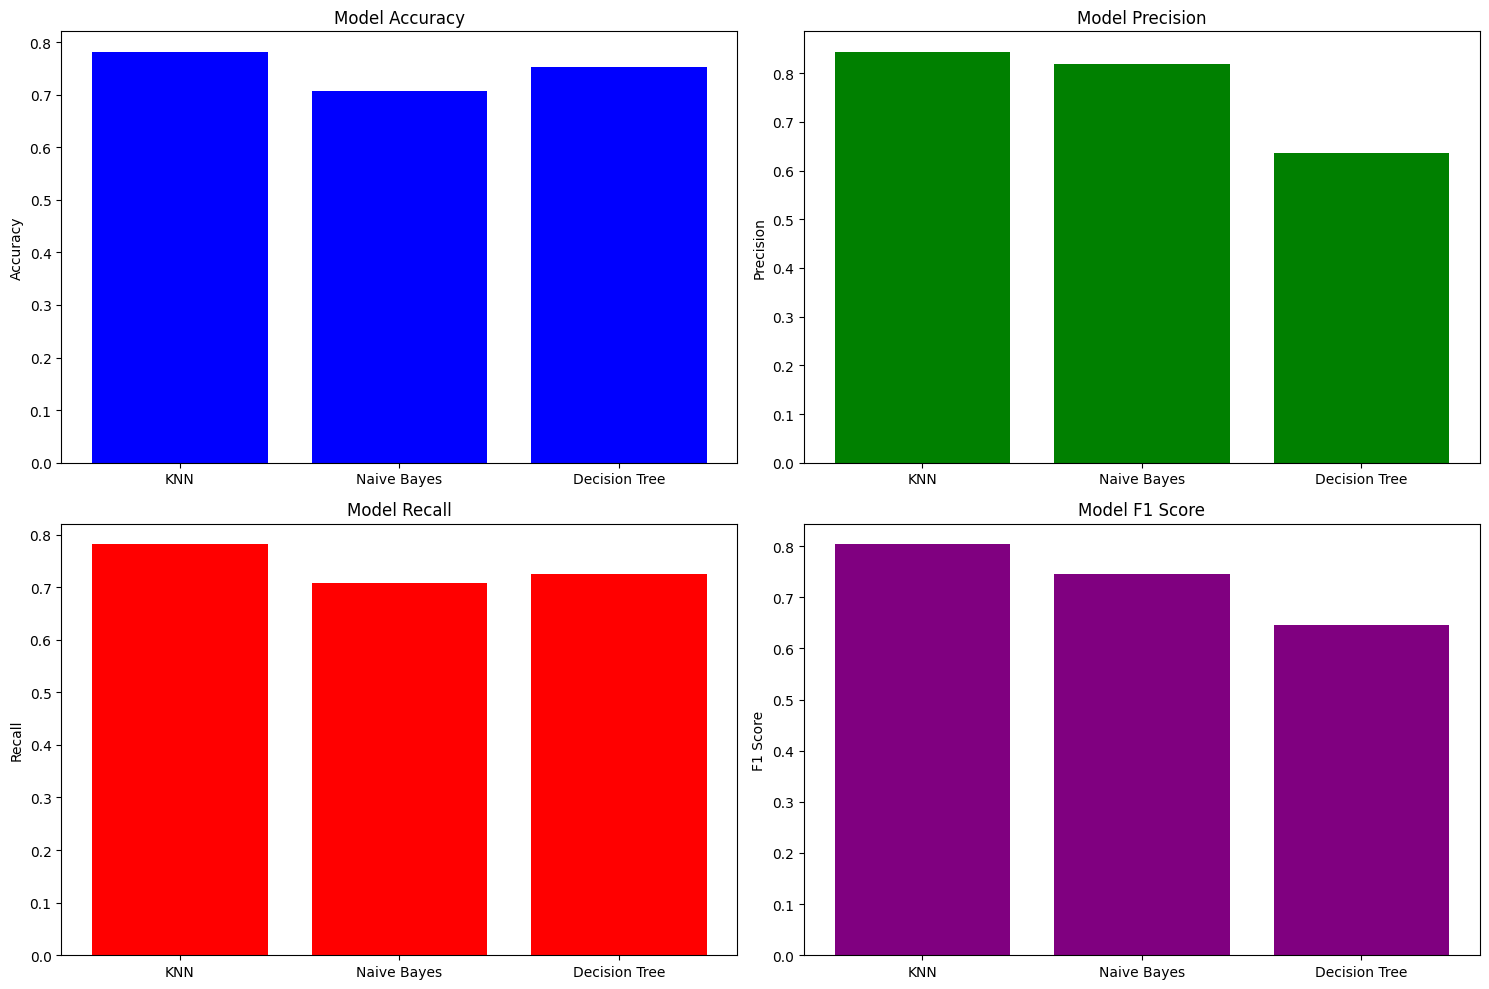

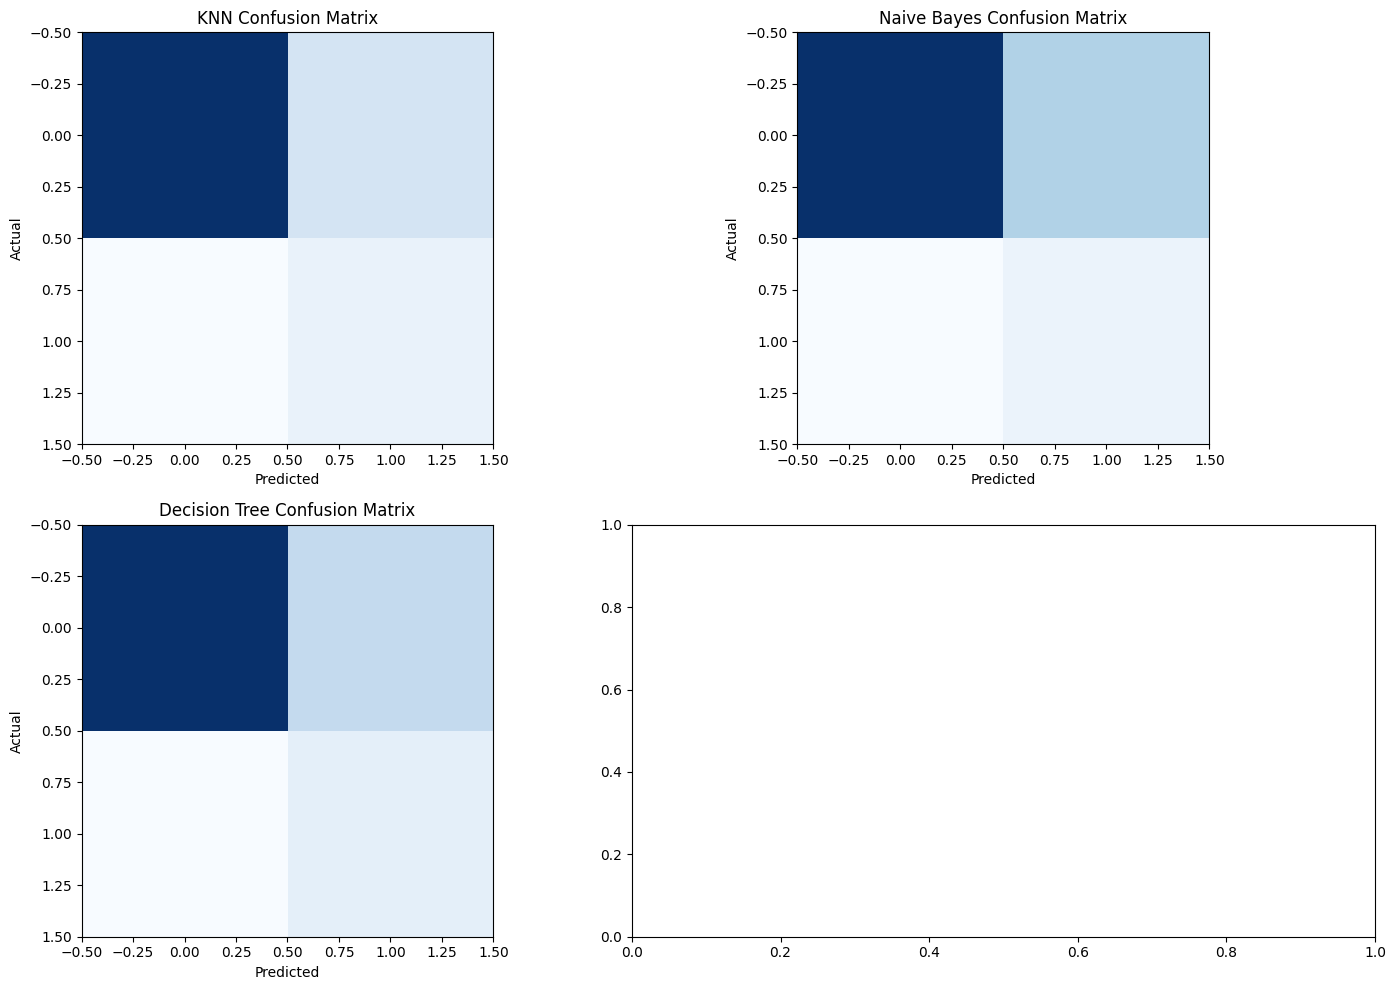

In [296]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


# Split the data
X = df.drop(['Id', 'Response'], axis=1)
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Define models
models = {
    "KNN": CustomKNN(neighbor_count=5),
    "Naive Bayes": CustomNaiveBayes()
}

# Evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    results[model_name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1": f1_score(y_test, y_pred, average='weighted'),
        "conf_matrix": confusion_matrix(y_test, y_pred)
    }

# Custom Decision Tree evaluation
tree = construct_decision_tree(X_train_smote, y_train_smote, max_tree_depth=5)
predictions_tree = np.array([predict_with_decision_tree(tree, sample) for sample in X_test])
tree_accuracy = accuracy_score(y_test, predictions_tree)
tree_conf_matrix = create_confusion_matrix(y_test, predictions_tree)
tree_precision, tree_recall, tree_f1 = calculate_classification_metrics(tree_conf_matrix)


tree_results = {
    "accuracy": tree_accuracy,
    "conf_matrix": tree_conf_matrix,
    "precision": tree_precision,
    "recall": tree_recall,
    "f1": tree_f1
}

results["Decision Tree"] = tree_results

# Function to safely extract mean values from results
def safe_mean(metric):
    if isinstance(metric, np.ndarray) or isinstance(metric, list):
        return np.mean(metric)
    return metric

# Collect all results into a DataFrame for easy comparison
results_df = pd.DataFrame({
    "Model": ["KNN", "Naive Bayes", "Decision Tree"],
    "Accuracy": [results["KNN"]["accuracy"], results["Naive Bayes"]["accuracy"], results["Decision Tree"]["accuracy"]],
    "Precision": [safe_mean(results["KNN"]["precision"]), safe_mean(results["Naive Bayes"]["precision"]), safe_mean(results["Decision Tree"]["precision"])],
    "Recall": [safe_mean(results["KNN"]["recall"]), safe_mean(results["Naive Bayes"]["recall"]), safe_mean(results["Decision Tree"]["recall"])],
    "F1 Score": [safe_mean(results["KNN"]["f1"]), safe_mean(results["Naive Bayes"]["f1"]), safe_mean(results["Decision Tree"]["f1"])]
})

print(results_df)

# Plot the comparison of the models
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy
ax[0, 0].bar(results_df["Model"], results_df["Accuracy"], color='blue')
ax[0, 0].set_title("Model Accuracy")
ax[0, 0].set_ylabel("Accuracy")

# Precision
ax[0, 1].bar(results_df["Model"], results_df["Precision"], color='green')
ax[0, 1].set_title("Model Precision")
ax[0, 1].set_ylabel("Precision")

# Recall
ax[1, 0].bar(results_df["Model"], results_df["Recall"], color='red')
ax[1, 0].set_title("Model Recall")
ax[1, 0].set_ylabel("Recall")

# F1 Score
ax[1, 1].bar(results_df["Model"], results_df["F1 Score"], color='purple')
ax[1, 1].set_title("Model F1 Score")
ax[1, 1].set_ylabel("F1 Score")

plt.tight_layout()
plt.show()

# Display the confusion matrices for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# KNN Confusion Matrix
axs[0, 0].imshow(results["KNN"]["conf_matrix"], cmap='Blues', interpolation='nearest')
axs[0, 0].set_title("KNN Confusion Matrix")
axs[0, 0].set_xlabel("Predicted")
axs[0, 0].set_ylabel("Actual")

# Naive Bayes Confusion Matrix
axs[0, 1].imshow(results["Naive Bayes"]["conf_matrix"], cmap='Blues', interpolation='nearest')
axs[0, 1].set_title("Naive Bayes Confusion Matrix")
axs[0, 1].set_xlabel("Predicted")
axs[0, 1].set_ylabel("Actual")

# Decision Tree Confusion Matrix
axs[1, 0].imshow(results["Decision Tree"]["conf_matrix"], cmap='Blues', interpolation='nearest')
axs[1, 0].set_title("Decision Tree Confusion Matrix")
axs[1, 0].set_xlabel("Predicted")
axs[1, 0].set_ylabel("Actual")

plt.tight_layout()
plt.show()
